<a href="https://colab.research.google.com/github/lucyporte/MUDSS/blob/main/Copy_of_lab_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Environment Initialization

## Install/upgrade libraries

Google Colab provides us with a pre-configured environment, but some packages are either outdated or have incompatiable issues. 

Therefore we need to upgrade them or reinstall them before.

In [ ]:
# upgrade basic libraries, these are all pre-installed by colab but often with old versions
!pip install --upgrade pandas
!pip install --upgrade pandas_datareader
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Exercise 1:

use `pip` command to install package `yfinance`.

Note:  `!` needs to be added in front of `pip` to make the notebook recognize it's a terminal command, not a python code


In [ ]:
# !pip install yfinance

!pip install yfinance

^C


## Exercise 2:
Let's import libraries:

By following the steps as we imported pandas
1. import pandas.datareader.data' as 'web'.
2. import 'matplotlob.pyplot' as 'plt'.


In [ ]:
# import pandas
import pandas as pd
# Series and DataFrame are both submodules of pandas
from pandas import Series, DataFrame

# Task (2)
import pandas_datareader.data as web

# Task (2)
import matplotlib.pyplot as plt

# import yfinance
import yfinance as yf

# 2. Load your data

Remember the starting point of stock market analysis is to specify a `time period`. 

In [ ]:
# (4)declare start and end time 
import datetime
start = datetime.datetime(2002,1,1)
end = datetime.datetime(2022,1,1)

## Exercise 3:

you will then need to be specific with:
1. **which company** you are analysing on
2. Which **api** you are using
3. **Time range** declared before

In [ ]:
df = web.DataReader(name="TSLA", data_source="yahoo", start=start, end=end)

## Exercise 4:

Then use `.tail()` function to inspect the last 10 rows of the data.

In [ ]:
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-17,320.220001,303.013336,304.923340,310.856659,100437300.0,310.856659
2021-12-20,307.230011,297.796661,303.566681,299.980011,56480100.0,299.980011
2021-12-21,313.166656,295.373322,305.623322,312.843323,71517900.0,312.843323
2021-12-22,338.553345,319.016663,321.886658,336.290009,93634200.0,336.290009
2021-12-23,357.660004,332.519989,335.600006,355.666656,92713200.0,355.666656
2021-12-27,372.333344,356.906677,357.890015,364.646667,71145900.0,364.646667
2021-12-28,373.000000,359.473328,369.829987,362.823334,60324000.0,362.823334
2021-12-29,368.000000,354.713318,366.213318,362.063324,56154000.0,362.063324
2021-12-30,365.183319,351.049988,353.776672,356.779999,47040900.0,356.779999


# 3. Stock analysis: Moving Average and Return Deviation

## Exercise 5:

Calculate the `moving average` of the stock market data you selected.

In [ ]:
# isolate the closing prices, indicate we are using the adjusted closing prices
close_px = df['Adj Close']

# (7)finish this cell, use the .rolling() function to set it as rolling window calculation with window size 20 and .mean() function to find the moving average
mavg = close_px.rolling(20).mean()

# inspect the results
mavg.tail()

Date
2021-12-27    339.925833
2021-12-28    339.117166
2021-12-29    338.140999
2021-12-30    337.729999
2021-12-31    337.266333
Name: Adj Close, dtype: float64

## Exercise 6:
Visualize the `mean average` by using `matplotlib`.


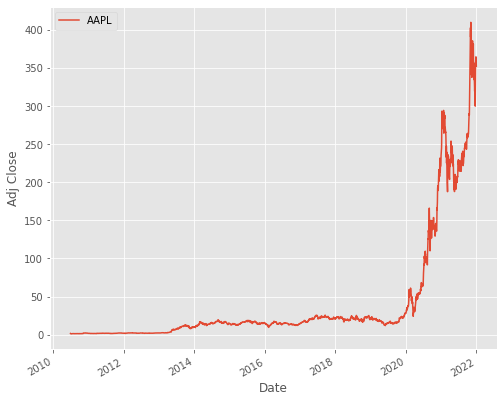

In [ ]:
%matplotlib inline

# change the style and figure size
plt.style.use('ggplot')
plt.rc('figure', figsize=(8,7))

# (9)plot mavg and label it within the same line 
close_px.plot(label='AAPL')

# label the y axis
plt.ylabel("Adj Close")
# .legend() will explicitly list all the labels on the graph
plt.legend()

## Exercise 7: 
Calculate `Return Deviation` and plot the graph.

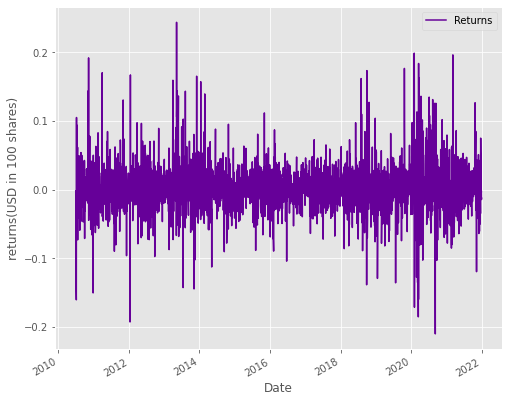

In [ ]:
# (10) indicate we are using and compare the adjusted closing prices to find returns
df['Returns'] = df['Adj Close'].pct_change()

# (11)similarly, plot the graph and by setting the color to '#660099' in the brackets
df['Returns'].plot(color='#660099')
plt.ylabel("returns(USD in 100 shares)")
plt.legend()

# 4. Statistical Moments

## Exercise 8:
Calculate the first moment (`mean` of youe annual return)

In [ ]:
import numpy as np

# the daily mean returns can be found by numpy without computing any maths
daily_mean_returns = np.mean(df['Returns'])
# + str will return the final results (a number) to a string (daily mean returns: a number)
print("Daily Mean Returns: " + str(daily_mean_returns))

# (13)assume there are 252 trading days per year, use the formula introduced to finish this expression and find the annual mean returns
annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Daily Mean Returns: 0.00248651106787464
Annual Mean Returns: 0.8697842561569429


## Exercise 9:
Calculate the second moment (variance)

In [ ]:
# daily standard deviation is also found by numpy library
daily_std = np.std(df['Returns'])
print("Daily Standard Deviation " + str(daily_std))
# annual standard deviation is equal to the daily standard deviation multiplied by the square root of the trading days per year (252)
annual_std = daily_std*np.sqrt(252)
print("Annual Standard Deviation " + str(annual_std ))

# using backslash n to separate these two pieces of information
print('\n')

# this finds the daily variance
daily_var= daily_std**2
print("Daily Variance " + str(daily_var))

# (14)the calculation for annual variance is exactly in the same format of daily variance
annual_var = annual_std**2
print("Annual Variance " + str(annual_var))

Daily Standard Deviation 0.0353865533820962
Annual Standard Deviation 0.5617441200284289


Daily Variance 0.0012522081602639441
Annual Variance 0.3155564563865139


## Exercise 10: 
Calculate the third moment (skewness)

In [ ]:
import scipy 
# (15)import skew from scipy (Hint: all of the statistics functions are located in the submodule scipy.stats )
import scipy.stats
from scipy.stats import skew

# remove all the missing values by .dropna()
returns = df['Returns'].dropna()
# skewness is also found by scipy straightforwardly
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: 0.4060497163908038


# 5. Result Analysis

Based on the statistics you have calculated, pick three segments from the stock market data you have chosen: 
1. One increasing;
2. One declining;
3. One stable;

And analyze their statistics respectively, briefly state how you can use the statistics taught on the Lecture session to identify whether a segment of stock market data is increasing, declining or keep stable in that time period.